In [59]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [60]:
def load_imagen(img_name):
    path1 = 'G:/.shortcut-targets-by-id/1Ow6KjVPo1myLESTKlM8Q0m1s8bsDHkGo/TratamientoDigitalImagenes_2022_2/texturas/' + img_name
    path2 = 'C:/Users/claudio.pacheco/Documents/Repositorio/texturas/' + img_name
    
    # Primer path
    img = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
    
    # Intentar segundo path
    if img is None:
        img = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
        
    # Mostrar imagen
    if img is not None:
        plt.imshow(img, cmap='gray')
        plt.show()
    else:
        print("No se pudo cargar la imagen")
    
    return img

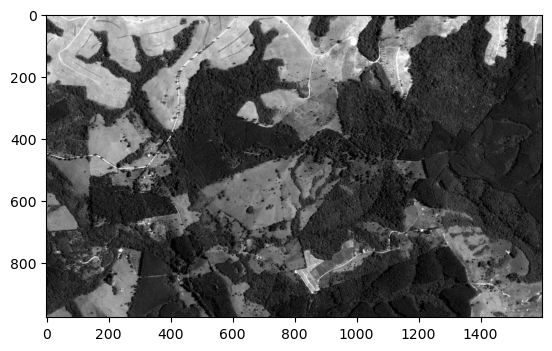

In [61]:
img=load_imagen('textures2.jpg')


In [62]:
def media_bloques(I, N):
    # Obtenemos las dimensiones de la imagen de entrada
    H, W = I.shape

    # Calculamos las dimensiones de la imagen de salida
    H_out = H // N
    W_out = W // N

    # Creamos una matriz vacía para almacenar los resultados de la media en bloques
    resultado = np.zeros((H_out, W_out))

    # Iteramos a través de bloques disjuntos de tamaño NxN en la imagen de entrada
    for i in range(H_out):
        for j in range(W_out):
            # Extraemos el bloque de la imagen
            bloque = I[i * N:(i + 1) * N, j * N:(j + 1) * N]
            
            # Calculamos la media de los valores en el bloque y la almacenamos en resultado
            resultado[i, j] = np.mean(bloque)

    return resultado



In [63]:
media_bloques(img, 2)

array([[186.  , 194.  , 199.  , ..., 239.5 , 196.5 , 196.5 ],
       [192.25, 209.75, 211.5 , ..., 208.5 , 192.25, 182.5 ],
       [210.25, 210.  , 214.  , ..., 203.25, 191.25, 175.5 ],
       ...,
       [110.5 , 122.25, 117.25, ..., 129.25, 122.5 , 129.25],
       [121.5 , 125.5 , 124.  , ..., 101.75, 112.25, 120.5 ],
       [126.75, 131.5 , 129.5 , ..., 119.5 ,  96.  , 119.25]])

In [64]:
#Varianza bloques
def varianza_bloques(I, N):
    # Obtenemos las dimensiones de la imagen de entrada
    H, W = I.shape

    # Calculamos las dimensiones de la imagen de salida
    H_out = H // N
    W_out = W // N

    # Creamos una matriz vacía para almacenar los resultados de la media en bloques
    resultado = np.zeros((H_out, W_out))

    # Iteramos a través de bloques disjuntos de tamaño NxN en la imagen de entrada
    for i in range(H_out):
        for j in range(W_out):
            # Extraemos el bloque de la imagen
            bloque = I[i * N:(i + 1) * N, j * N:(j + 1) * N]
            
            # Calculamos la media de los valores en el bloque y la almacenamos en resultado
            resultado[i, j] = np.var(bloque)

    return resultado

#rango_bloques
def rango_bloques(I, N):
    # Obtenemos las dimensiones de la imagen de entrada
    H, W = I.shape

    # Calculamos las dimensiones de la imagen de salida
    H_out = H // N
    W_out = W // N

    # Creamos una matriz vacía para almacenar los resultados de la media en bloques
    resultado = np.zeros((H_out, W_out))

    # Iteramos a través de bloques disjuntos de tamaño NxN en la imagen de entrada
    for i in range(H_out):
        for j in range(W_out):
            # Extraemos el bloque de la imagen
            bloque = I[i * N:(i + 1) * N, j * N:(j + 1) * N]
            
            # Calculamos la media de los valores en el bloque y la almacenamos en resultado
            resultado[i, j] = np.max(bloque) - np.min(bloque)

    return resultado

In [65]:
print("Varianza bloques: \n", media_bloques(img, 2))
print("Rango bloques: \n", varianza_bloques(img, 2))

Varianza bloques: 
 [[186.   194.   199.   ... 239.5  196.5  196.5 ]
 [192.25 209.75 211.5  ... 208.5  192.25 182.5 ]
 [210.25 210.   214.   ... 203.25 191.25 175.5 ]
 ...
 [110.5  122.25 117.25 ... 129.25 122.5  129.25]
 [121.5  125.5  124.   ... 101.75 112.25 120.5 ]
 [126.75 131.5  129.5  ... 119.5   96.   119.25]]
Rango bloques: 
 [[2.150000e+01 9.500000e+00 2.450000e+01 ... 3.082500e+02 9.225000e+01
  1.482500e+02]
 [2.346875e+02 4.218750e+01 1.625000e+01 ... 3.042500e+02 1.346875e+02
  5.025000e+01]
 [2.486875e+02 1.140000e+02 8.450000e+01 ... 6.918750e+01 1.086875e+02
  2.075000e+01]
 ...
 [3.725000e+01 3.618750e+01 6.518750e+01 ... 1.268750e+01 2.825000e+01
  1.875000e-01]
 [4.025000e+01 2.250000e+00 0.000000e+00 ... 3.441875e+02 3.268750e+01
  4.250000e+00]
 [1.818750e+01 4.250000e+00 6.750000e+00 ... 2.142500e+02 4.850000e+01
  1.818750e+01]]


In [66]:
# Función para obtener la imagen y sus respectivos resultados
def process_image(image_path, N):
    # Cargar imagen
    imagen = load_imagen(image_path)
    if imagen is None:
        return

    # Aplicar media_bloques
    media_resultante = media_bloques(imagen, N)

    # Aplicar varianza_bloques
    varianza_resultante = varianza_bloques(imagen, N)

    # Aplique rango_bloques
    rango_resultante = rango_bloques(imagen, N)
# Ajustar el tamaño de las imágenes de salida para que coincidan con el tamaño de la imagen de entrada
    H, W = imagen.shape

    media_resultante = cv2.resize(media_resultante, (W, H), interpolation=cv2.INTER_NEAREST)
    varianza_resultante = cv2.resize(varianza_resultante, (W, H), interpolation=cv2.INTER_NEAREST)
    rango_resultante = cv2.resize(rango_resultante, (W, H), interpolation=cv2.INTER_NEAREST)

    print("Media en bloques:")
    print(media_resultante)
    print("\nVarianza en bloques:")
    print(varianza_resultante)
    print("\nRango en bloques:")
    print(rango_resultante)


In [67]:
path1 = 'G:/.shortcut-targets-by-id/1Ow6KjVPo1myLESTKlM8Q0m1s8bsDHkGo/TratamientoDigitalImagenes_2022_2/texturas/'
path2 = 'C:/Users/claudio.pacheco/Documents/Repositorio/texturas/'
path = path1 if os.path.isdir(path1) else path2
files = os.listdir(path)
#Solo se utilizarán los archivos .jpg
files = [f for f in files if f.endswith('.jpg')]
files

['textures2.jpg', 'textures1.jpg']

Procesando imagen: textures2.jpg


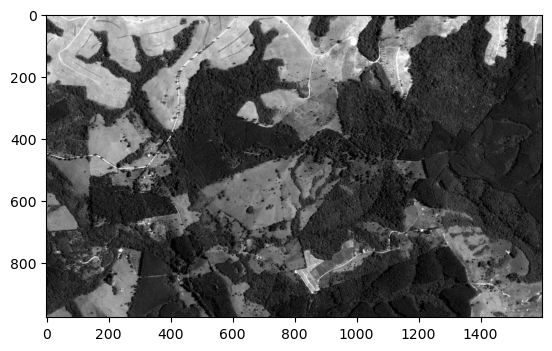

Media en bloques:
[[186.   186.   194.   ... 196.5  196.5  196.5 ]
 [186.   186.   194.   ... 196.5  196.5  196.5 ]
 [192.25 192.25 209.75 ... 192.25 182.5  182.5 ]
 ...
 [121.5  121.5  125.5  ... 112.25 120.5  120.5 ]
 [126.75 126.75 131.5  ...  96.   119.25 119.25]
 [126.75 126.75 131.5  ...  96.   119.25 119.25]]

Varianza en bloques:
[[ 21.5     21.5      9.5    ...  92.25   148.25   148.25  ]
 [ 21.5     21.5      9.5    ...  92.25   148.25   148.25  ]
 [234.6875 234.6875  42.1875 ... 134.6875  50.25    50.25  ]
 ...
 [ 40.25    40.25     2.25   ...  32.6875   4.25     4.25  ]
 [ 18.1875  18.1875   4.25   ...  48.5     18.1875  18.1875]
 [ 18.1875  18.1875   4.25   ...  48.5     18.1875  18.1875]]

Rango en bloques:
[[13. 13.  7. ... 27. 28. 28.]
 [13. 13.  7. ... 27. 28. 28.]
 [38. 38. 18. ... 29. 17. 17.]
 ...
 [17. 17.  4. ... 14.  5.  5.]
 [12. 12.  5. ... 19.  9.  9.]
 [12. 12.  5. ... 19.  9.  9.]]



Procesando imagen: textures1.jpg


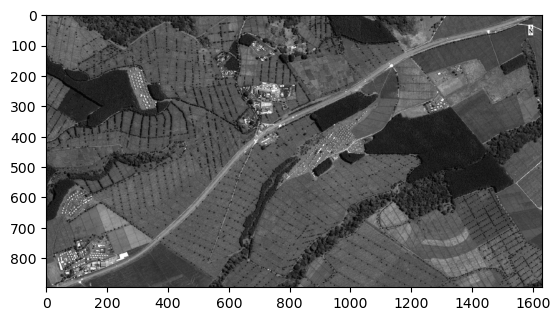

Media en bloques:
[[104.25 104.25  96.   ...  65.    88.    88.  ]
 [104.25 104.25  96.   ...  65.    88.    88.  ]
 [ 90.    90.   112.25 ...  86.75  82.25  82.25]
 ...
 [ 88.5   88.5   82.75 ...  21.5   60.    60.  ]
 [ 83.5   83.5   82.75 ...  63.    71.5   71.5 ]
 [ 83.5   83.5   82.75 ...  63.    71.5   71.5 ]]

Varianza en bloques:
[[ 13.6875  13.6875 102.     ... 160.      83.5     83.5   ]
 [ 13.6875  13.6875 102.     ... 160.      83.5     83.5   ]
 [ 66.5     66.5     27.1875 ...   1.6875   8.1875   8.1875]
 ...
 [  6.75     6.75     3.1875 ...  76.25    57.5     57.5   ]
 [ 12.25    12.25     3.6875 ... 126.5     22.75    22.75  ]
 [ 12.25    12.25     3.6875 ... 126.5     22.75    22.75  ]]

Rango en bloques:
[[10. 10. 28. ... 32. 25. 25.]
 [10. 10. 28. ... 32. 25. 25.]
 [19. 19. 14. ...  3.  8.  8.]
 ...
 [ 6.  6.  5. ... 24. 19. 19.]
 [ 9.  9.  5. ... 29. 12. 12.]
 [ 9.  9.  5. ... 29. 12. 12.]]





In [68]:
#Aplicar a todas las imagenes
for file in files:
    print("Procesando imagen:", file)
    process_image(file, 2)
    print("\n\n")

In [69]:
#Aplicar método de Sobel
def contorno(image_path, N):
    # Cargo la imagen
    imagen = load_imagen(image_path)
    if imagen is None:
        return
    
    #Aplicar sobel
    sobelx = cv2.Sobel(imagen,cv2.CV_64F,1,0,ksize=5)
    sobely = cv2.Sobel(imagen,cv2.CV_64F,0,1,ksize=5)

    #Mostrar imagen
    figure, axes, = plt.subplots(1, 2, figsize=(10, 10))
    axes[0].imshow(sobelx, cmap='gray')
    axes[1].imshow(sobely, cmap='gray')
    plt.show()
    #Mostrar media, varianza y rango
    print("Media en bloques x:\n", media_bloques(sobelx, 2))
    print("Media en bloques y:\n", media_bloques(sobely, 2))
    print("Varianza en bloques x:\n", varianza_bloques(sobelx, 2))
    print("Varianza en bloques y:\n", varianza_bloques(sobely, 2))
    print("Rango en bloques x:\n", rango_bloques(sobelx, 2))
    print("Rango en bloques y:\n", rango_bloques(sobely, 2))

Procesando imagen: textures2.jpg


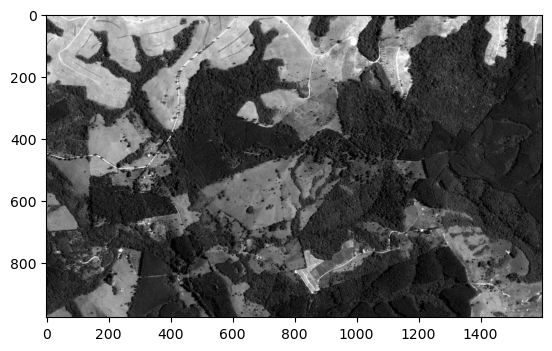

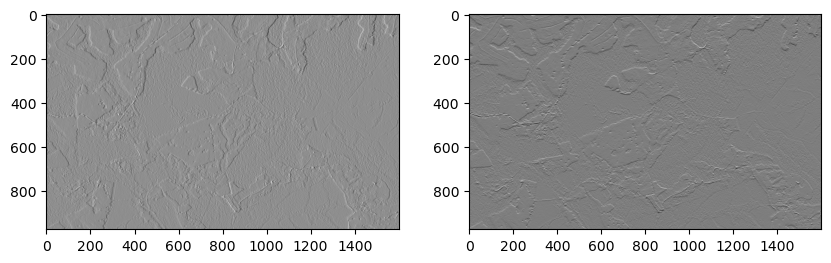

Media en bloques x:
 [[  302.     472.75   524.25 ... -2294.75 -1263.25   147.75]
 [  365.5    408.75   365.25 ... -2255.25  -968.25  -135.25]
 [   13.     578.25     5.   ... -1606.    -837.25  -324.25]
 ...
 [  276.      28.75    -9.5  ...  -669.75   198.25   159.25]
 [  173.25    33.5    -34.25 ... -1370.25   651.75   281.5 ]
 [  121.     -13.5    -75.   ... -1800.     530.25   495.5 ]]
Media en bloques y:
 [[ 206.    370.25  275.75 ... -505.75 -323.75 -226.75]
 [ 789.5   496.75  456.25 ... -708.75 -117.25 -658.75]
 [-247.   -178.25  -94.   ... -537.5   111.25  500.75]
 ...
 [1355.5  1496.25 1645.   ... -375.25 -606.75 -468.75]
 [ 517.25  293.5   243.25 ... -720.25 -895.25 -481.5 ]
 [  95.    126.5   126.   ...  293.    -93.75  -87.5 ]]
Varianza en bloques x:
 [[9.47320000e+04 1.52386875e+04 1.93861875e+04 ... 1.58492688e+05
  4.32230688e+05 2.22951875e+04]
 [1.42170750e+05 3.16131875e+04 9.76068750e+03 ... 1.46158688e+05
  6.00061875e+04 4.39436875e+04]
 [3.69700000e+03 2.51516875e

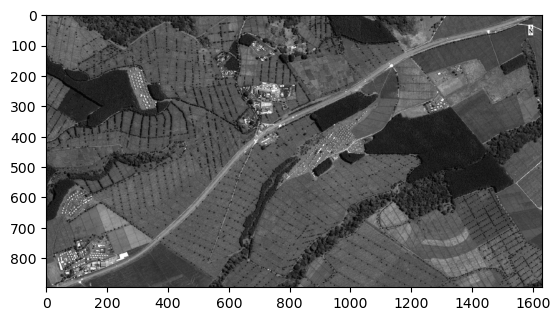

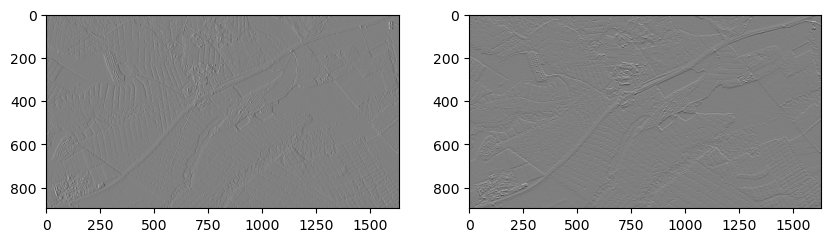

Media en bloques x:
 [[  -29.5   -209.75   177.   ...   879.25   675.5    386.25]
 [  394.     889.5    116.75 ...   477.75   134.75    13.75]
 [  489.5    880.75   327.   ...   314.     151.     -83.5 ]
 ...
 [   52.      10.     239.5  ... -1698.25   351.     698.75]
 [  -65.75  -151.    -165.   ... -1785.     831.     810.5 ]
 [  -38.25  -211.25  -217.5  ... -1055.75   457.     329.  ]]
Media en bloques y:
 [[-141.5   384.25  619.   ...  774.25  530.5    69.75]
 [-942.    -82.5   462.75 ...  570.25  283.75  -50.25]
 [  74.5  -477.75 -883.   ... -107.5     3.    -21.5 ]
 ...
 [ 342.    321.5   102.5  ... -541.75  357.   1601.25]
 [ 400.25  249.     94.   ... 1098.5  1109.5   482.  ]
 [-119.75  -59.25  -92.   ...  535.25  866.5   505.  ]]
Varianza en bloques x:
 [[8.19075000e+03 2.72071875e+04 3.40100000e+03 ... 1.19182688e+05
  4.47567500e+04 1.58642188e+05]
 [1.75638000e+05 9.37562500e+04 2.52571875e+04 ... 6.71186875e+04
  4.78718750e+03 7.57018750e+03]
 [2.42422750e+05 1.08903688e

In [70]:
for file in files:
    print("Procesando imagen:", file)
    contorno(file, 2)
    print("\n\n")

## Observaciones de los resultados

La función media_bloques se encarga de tomar una imagen y dividirla en bloques de tamaño N x N. Luego, calcula el valor medio de los píxeles en cada bloque. El resultado es una matriz en la que cada elemento representa el valor medio de un bloque de la imagen.

Los resultados mostrados tras la ejecución de media_bloques muestran una serie de matrices. Cada matriz representa el valor medio de los píxeles para cada bloque de tamaño N x N en la imagen.

Los valores medios permiten identificar patrones o variaciones en la textura. Por ejemplo, un valor medio alto en un bloque indica que ese segmento de la imagen es relativamente claro, mientras que un valor medio bajo sugiere que es más oscuro.

En el caso de varianza_bloques, permite darse cuente donde hay mayor variabilidad en la textura o el patrón. Por otra parte, rango_bloques permite identificar donde hay mayor contraste en la imagen.

Utilizando el método de sobel, detectamos los bordes en las direcciones x y y. Luego entonces, utilizando las métricas de media, varianza y rango, podemos identificar donde hay mayor variabilidad en la textura o el patrón y dónde hay mayor contraste en los bordes.